<h2>HSTaXe Installation</h2>

Import a few Python modules

In [2]:
from astropy.io import fits
import numpy as np
import os, shutil

from drizzlepac import astrodrizzle

from hstaxe import axetasks




In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

We save the current working directory

In [4]:
cwd = os.getcwd()
print("We are in %s" % (cwd))

We are in /Users/npirzkal/axe/aXe_Cookbook


<H2>Preparing the G141 data

We will create a G141 subdirectory to copy all of the G141 files into. This where we will prepare the G141 data

Creating the directory, removing any existing one

In [5]:
os.chdir(cwd)
if os.path.isdir("G141"):
    shutil.rmtree("G141")
os.mkdir("G141")

Copying the G141 data (which we grab from our cookbook_data directory)

In [6]:
os.system("cp cookbook_data/G141/*flt.fits G141/")
os.system("cp cookbook_data/G141/G141.lis G141/")

0

We move into the G141 directory and check the content of the G141.lis file

In [7]:
os.chdir(cwd)
os.chdir("G141")
!cat G141.lis

ib6o23rsq_flt.fits
ib6o23ruq_flt.fits
ib6o23ryq_flt.fits
ib6o23s0q_flt.fits

We now create a G141 mosaic using the G141 data

This mosaic will be used to set up the proper astrometry for each individual FLT files. We can only extract G141 spectra from FLT files which have been used to make this mosaic

In [8]:
astrodrizzle.AstroDrizzle("@G141.lis",output="G141",build=True)

Setting up logfile :  astrodrizzle.log
AstroDrizzle Version 3.1.8 (2020-07-27 10:34:52 -0400) started at: 20:26:17.354 (02/11/2020)

==== Processing Step  Initialization  started at  20:26:17.357 (02/11/2020)

Preserving original of:  ib6o23rsq_flt.fits as  OrIg_files/ib6o23rsq_flt.fits
Preserving original of:  ib6o23ruq_flt.fits as  OrIg_files/ib6o23ruq_flt.fits
Preserving original of:  ib6o23ryq_flt.fits as  OrIg_files/ib6o23ryq_flt.fits
Preserving original of:  ib6o23s0q_flt.fits as  OrIg_files/ib6o23s0q_flt.fits
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 53.07112904468524  -27.709598577512786  
CRPIX : 620.0  519.0  
CD1_1 CD1_2  : 3.4259876358475255e-05  9.767371884309525e-06  
CD2_1 CD2_2  : 9.767371884309525e-06  -3.4259876358475255e-05  
NAXIS : 1240  1038
********************************************************************************
*
*  Estimated memory usage:  up to 90 Mb.
*  Output image size:       1240 X 1038 pixels. 
*  Output image fi

                   Blot          1.0419 sec.
                Driz_CR          1.1198 sec.
          Final Drizzle          2.0424 sec.
   ====================          ====================
                  Total          7.2612 sec.

Trailer file written to:  astrodrizzle.log


We now prepare the F140W Imaging data

We already created a mosaic of all the G141 data for astrometric purposes, and we now create an F140W mosaic using the G141 mosaic as the astrometric reference frame. This will ensure that the G141 and F140W mosaics have pixels with the same RA and DEC. 
The process is similar to what we did with the G141 data and we do this in a F140W sub-directory. The F140W mosaic is generated with the same WCS as the G141 mosaic we already generated.

Creating the directory, removing any existing one

In [9]:
os.chdir(cwd)

if os.path.isdir("F140W"):
    shutil.rmtree("F140W")

os.mkdir("F140W")


Copy the F140W data (which we grab from our cookbook_data directory)

In [10]:
os.system("cp cookbook_data/F140W/*flt.fits F140W/")
os.system("cp cookbook_data/F140W/F140W.lis F140W/")

0

We move into the F140W directory and check the content of the F140W.lis file

In [11]:
os.chdir(cwd)
os.chdir("F140W")
!cat F140W.lis

ib6o23rtq_flt.fits
ib6o23rwq_flt.fits
ib6o23rzq_flt.fits
ib6o23s2q_flt.fits


We create a F140W mosaic using the F140W data and the G141 mosaic as a reference

In [12]:
ref = "../G141/G141_drz.fits[1]"
astrodrizzle.AstroDrizzle("@F140W.lis",output="F140W",in_memory=False,skysub="yes",build=True,driz_cr_corr=True,driz_cr=True,final_wcs=True,driz_separate=True,driz_sep_wcs=True,driz_sep_refimage=ref,final_refimage=ref)

Setting up logfile :  astrodrizzle.log
AstroDrizzle Version 3.1.8 (2020-07-27 10:34:52 -0400) started at: 20:26:24.940 (02/11/2020)

==== Processing Step  Initialization  started at  20:26:24.944 (02/11/2020)

Preserving original of:  ib6o23rtq_flt.fits as  OrIg_files/ib6o23rtq_flt.fits
Preserving original of:  ib6o23rwq_flt.fits as  OrIg_files/ib6o23rwq_flt.fits
Preserving original of:  ib6o23rzq_flt.fits as  OrIg_files/ib6o23rzq_flt.fits
Preserving original of:  ib6o23s2q_flt.fits as  OrIg_files/ib6o23s2q_flt.fits
Creating OUTPUT WCS from ../G141/G141_drz.fits[1]
WCS Keywords

CD_11  CD_12: 3.42598763584752e-05 9.76737188430952e-06
CD_21  CD_22: 9.76737188430952e-06 -3.4259876358475e-05
CRVAL    : 53.07112904468524 -27.70959857751279
CRPIX    : 620.0 519.0
NAXIS    : 1240 1038
Plate Scale : 0.1282500028610227
ORIENTAT : 164.08733290095458
********************************************************************************
*
*  Estimated memory usage:  up to 90 Mb.
*  Output image size:  


         Initialization          0.6742 sec.
            Static Mask          0.1311 sec.
           Subtract Sky          0.5270 sec.
       Separate Drizzle          1.0439 sec.
          Create Median          0.6480 sec.
                   Blot          1.1154 sec.
                Driz_CR          1.1483 sec.
          Final Drizzle          2.0795 sec.
   ====================          ====================
                  Total          7.3673 sec.

Trailer file written to:  astrodrizzle.log


The F140W and G141 should be aligned and bright objects should generate bright spectra in the expected position. We should see very liittle offset in the y-direction for WFC3 IR grism data

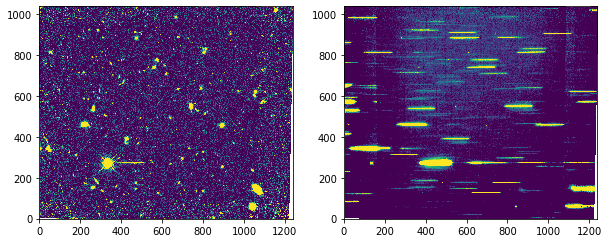

In [14]:
plt.rcParams["figure.figsize"] = (10,7)
plt.subplot(1,2,1)
d = fits.open("F140W_drz.fits")[1].data
im1 = plt.imshow(d,origin="corner")
im1.set_clim(0,.2)

plt.subplot(1,2,2)
d = fits.open("../G141/G141_drz.fits")[1].data
im1 = plt.imshow(d,origin="corner")
im1.set_clim(0,.2)

We create an object catalog using sextractor

This is one step that needs to be done carefully as several things can go wrong.
- Make sure you set the magnitude zeropoint properly for the image you are using
- One can generate a simple catalog using:

    sex -c aXe.sex F140W_drz.fits[1] -DETECT_THRESH 5 -MAG_ZEROPOINT 26.4525
    
    
- See aXe.param for the required parameters that aXe will be looking for
- Check the resulting catalog to make sure that all objects have good magnitudes (i.e. no mag of 99.)
- Edit cookbook.cat and rename column MAG_ISO with MAG_F1392, or you will get an "aXeError: Catalogue: test.cat does not contain any magnitude column!" error when running iolprep

This catalog, when doing a simple extraction, will be used to compute the SED of each sources. These SEDs will be used to compute our contamination models. In this example, we used a single band, F140W, but we could have added information in other bands such as F125W for example. This requires running Sextractor in matched photometry mode, and the creation of a catalog where magnitudes in multiple bands are properly listed

For simplicity, here, we copy an already generated catalog:

In [15]:
os.system("cp ../cookbook_data/cookbook.cat .")
!cat cookbook.cat

#   1 X_IMAGE                Object position along x                                    [pixel]
#   2 Y_IMAGE                Object position along y                                    [pixel]
#   3 NUMBER                 Running object number                                     
#   4 X_WORLD                Barycenter position along world x axis                     [deg]
#   5 Y_WORLD                Barycenter position along world y axis                     [deg]
#   6 A_IMAGE                Profile RMS along major axis                               [pixel]
#   7 B_IMAGE                Profile RMS along minor axis                               [pixel]
#   8 THETA_IMAGE            Position angle (CCW/x)                                     [deg]
#   9 A_WORLD                Profile RMS along major axis (world units)                 [deg]
#  10 B_WORLD                Profile RMS along minor axis (world units)                 [deg]
#  11 THETA_WORLD            Position angle (CCW/world-x) 

We can now run aXe

We start by setting up some necessary environment variables that point to the various aXe directories.
Make sure that you keep the path length to be less than 80 characters when the code points to individual data files, or about 60 characters without the file names to be safe

Create a directory called CONF and copy the WFC3 G141 IR Calibration files in there.

In [16]:
os.chdir(cwd)

if os.path.isdir("CONF"):
    shutil.rmtree("CONF")
os.mkdir("CONF")

os.system("cp cookbook_data/CONF/* CONF/")

0

Set up some work directories and environment variables required by aXe:

In [17]:
import os

os.chdir(cwd)

if os.path.isdir("DATA"):
    shutil.rmtree("DATA")
os.mkdir("DATA")
os.environ['AXE_IMAGE_PATH'] = './DATA/' 
print ('--> variable AXE_IMAGE_PATH   set to "./DATA/"')

os.environ['AXE_CONFIG_PATH'] = './CONF/'
print ('--> variable AXE_CONFIG_PATH  set to "./CONF/"')

if os.path.isdir("OUTPUT"):
    shutil.rmtree("OUTPUT")
os.mkdir("OUTPUT")
os.environ['AXE_OUTPUT_PATH'] = './OUTPUT/'
print ('--> variable AXE_OUTPUT_PATH  set to "./OUTPUT/"')

print ("Length of AXE_IMAGE_PATH is",len(os.environ['AXE_IMAGE_PATH']),"characters")


--> variable AXE_IMAGE_PATH   set to "./DATA/"
--> variable AXE_CONFIG_PATH  set to "./CONF/"
--> variable AXE_OUTPUT_PATH  set to "./OUTPUT/"
Length of AXE_IMAGE_PATH is 7 characters


We define the FOV boundaries for the WFC3 IR observations

In [18]:
dimension_info = "183,85,50,50"

We copy the G141 FLT files and the F140W FLT files in the DATA directory

You can either use the original data or optionally the FLT files used to create the G141 mosaic earlier, which will have some extra bad pixels flagging

In [19]:
os.system("cp G141/*flt.fits DATA/")
os.system("cp F140W/*flt.fits DATA/")

0

We use the iolprep aXe task to generate individual F140W catalogs

This task will create the individual F140W extraction catalogs, one for each of the files listed in the F140W.lis file. 
We pass the F140W mosaic to it, as it contains all the information about all the individual F140W FLT file.

In [20]:
os.chdir(cwd)
os.chdir("F140W")

axetasks.iolprep(drizzle_image='F140W_drz.fits',
                     input_cat='cookbook.cat',
                     dimension_in=dimension_info)

We copy the newly create catalog files into the DATA directory

In [21]:
os.system("cp ib6o23*_1.cat ../DATA/")

0

We are almost ready to extract the spectra.
We need to create an file aXe.lis containing the G141 images, expected catalog names and associated F140W direct images

The G141 mosaic we created earlier is not used directly during the aXe extraction process. However, the F140W mosaic was used to create an object master catalog. This catalog will be processed to generate individual object catalogs for the files used to create the F140W mosaic. The aXe.lis file lists which F140W images are logically associated with a particular G141 image. Ideally, these are images taken in the same HST visit so that we can be sure that the WCS of both files are consistent.

The aXe.lis file is a simple text file, with a slightly different format than the one above. In this file, each line contains 3 items:
- The name of a G141 FLT file (e.g. [grism_rootname]_flt.fits
- A catalog name with a name of [direct_rootname]_flt_1.cat
- The name of the direct imaging file [direct_rootname]_flt.fits associated with the G141 data and the catalog. 
    
At this stage, we only have items 1 and 2.

In [22]:
os.chdir(cwd)
os.system("cp cookbook_data/aXe.lis .")
!cat aXe.lis

ib6o23rsq_flt.fits ib6o23rtq_flt_1.cat ib6o23rtq_flt.fits
ib6o23ruq_flt.fits ib6o23rwq_flt_1.cat ib6o23rwq_flt.fits
ib6o23ryq_flt.fits ib6o23rzq_flt_1.cat ib6o23rzq_flt.fits
ib6o23s0q_flt.fits ib6o23s2q_flt_1.cat ib6o23s2q_flt.fits



We run aXeprep. This task will amongst other things take care of background subtracting the G141 data using a single master sky.

In [24]:
os.chdir(cwd)

axetasks.axeprep(inlist="aXe.lis",
                     configs="G141.F140W.V4.31.conf",
                     backgr=True,
                     backims="WFC3.IR.G141.sky.V1.0.fits",
                     norm=False,
                     mfwhm=3.0)


We can now proceed with a simple box extraction of our G141 spectra. This will not combine individual 1D spectra and we create one extracted spectrum per object and get G141 FLT file we are processing. 
The contamination is estimated using the Gaussian model of each object that is included in the  SExtractor object catalog test.cat.

For each of the G141 input FLT file, this will create the following in the OUTPUT/ directory:
- [rootname]_flt_2.cat : Object catalog for the FLT file [rootname]_flt.fits
- [rootname]_flt_2.OAF : Aperture file
- [rootname]_flt_2.PET.fits : The Pixel Extraction Table, containing all the unbinned information about each spectrum
- [rootname]_flt_2.SPC.fits : 1D extracted spectra
- [rootname]_flt_2.CONT.fits : Contamination estimate for eact of the spectra
- [rootname]_flt_2_opt.SPC.fits : Optimally extracted version of the 1D spectra

While running the next notebook cell, please check the main terminal window as the aXe routines will output things in there. It will take a few minutes to run


In [25]:
axetasks.axecore('aXe.lis',
                 "G141.F140W.V4.31.conf",
                 extrfwhm=4.,
                 drzfwhm=3.,
                 backfwhm=0.,
                 orient=False,
                 weights=True,
                 slitless_geom=False,
                 cont_model='gauss',
                 sampling='drizzle',
                 exclude=True)



Writing non-linear coefficients to file


Storing non-linear coefficients: 
WFC3: IR

DRZSCALE set to: 0.1282500028610229

Writing non-linear coefficients to file


Storing non-linear coefficients: 
WFC3: IR

DRZSCALE set to: 0.1282500028610229

Writing non-linear coefficients to file


Storing non-linear coefficients: 
WFC3: IR

DRZSCALE set to: 0.1282500028610229

Writing non-linear coefficients to file


Storing non-linear coefficients: 
WFC3: IR

DRZSCALE set to: 0.1282500028610229


Results are in the directory pointed to by os.environ['AXE_OUTPUT_PATH'], i.e. ./OUTPUT 
1D and 2D spectra extracted from individual FLT files are available. These are not combined.
SPC files contained 1D spectra, opt.SPC files contained optimally extracted spectra (using gaussian profiles), STP files contain 2D stamps. CONT files contain the contamination estimate (gaussian based)

In [26]:
!ls OUTPUT/*SPC.fits
!ls OUTPUT/*STP.fits

OUTPUT/ib6o23rsq_flt_2.SPC.fits     OUTPUT/ib6o23ryq_flt_2.SPC.fits
OUTPUT/ib6o23rsq_flt_2_opt.SPC.fits OUTPUT/ib6o23ryq_flt_2_opt.SPC.fits
OUTPUT/ib6o23ruq_flt_2.SPC.fits     OUTPUT/ib6o23s0q_flt_2.SPC.fits
OUTPUT/ib6o23ruq_flt_2_opt.SPC.fits OUTPUT/ib6o23s0q_flt_2_opt.SPC.fits
OUTPUT/ib6o23rsq_flt_2.STP.fits OUTPUT/ib6o23ryq_flt_2.STP.fits
OUTPUT/ib6o23ruq_flt_2.STP.fits OUTPUT/ib6o23s0q_flt_2.STP.fits


We can examine individual 2D spectra from the STP files. Note that the STP files are meant for quality control and are not calibrated versions of the 2D spectra. 

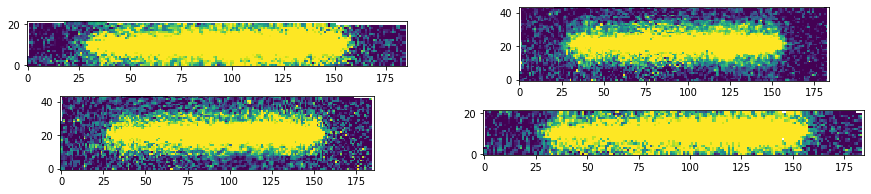

In [29]:
ID = 199

plt.rcParams["figure.figsize"] = (15,3)
plt.subplot(2,2,1)
try:
    d1 = fits.open("OUTPUT/ib6o23rsq_flt_2.STP.fits")["BEAM_%dA" % (ID)].data
    im1 = plt.imshow(d1,origin="corner")
    im1.set_clim(0,.1)
except:
    pass

plt.subplot(2,2,2)
try:
    d1 = fits.open("OUTPUT/ib6o23ryq_flt_2.STP.fits")["BEAM_%dA" % (ID)].data
    im1 = plt.imshow(d1,origin="corner")
    im1.set_clim(0,.1)
except:
    pass

plt.subplot(2,2,3)
try:
    d1 = fits.open("OUTPUT/ib6o23ruq_flt_2.STP.fits")["BEAM_%dA" % (ID)].data
    im1 = plt.imshow(d1,origin="corner")
    im1.set_clim(0,.1)
except:
    pass

plt.subplot(2,2,4)
try:
    d1 = fits.open("OUTPUT/ib6o23s0q_flt_2.STP.fits")["BEAM_%dA" % (ID)].data
    im1 = plt.imshow(d1,origin="corner")
    im1.set_clim(0,.1)
except:
    pass



We now examine the calibrated 1D spectra of one of the sources:

OUTPUT/ib6o23rsq_flt_2.SPC.fits
OUTPUT/ib6o23ruq_flt_2.SPC.fits
OUTPUT/ib6o23ryq_flt_2.SPC.fits
OUTPUT/ib6o23s0q_flt_2.SPC.fits


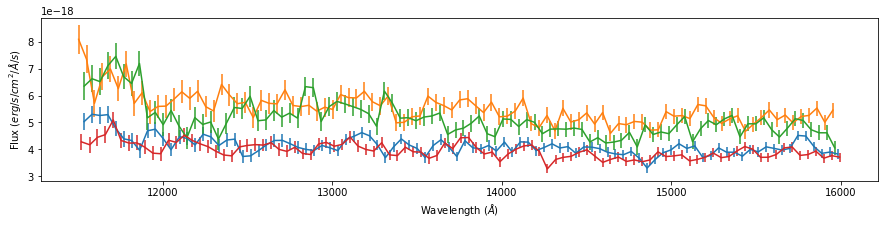

In [30]:
import glob
for s in glob.glob("OUTPUT/ib6o2*2.SPC.fits"):
    print( s)
    d1 = fits.open(s)["BEAM_%dA" % (ID)].data
    w = d1["LAMBDA"]
    f = d1["FLUX"]
    e = d1["FERROR"]
    vg = (w>11500) & (w<16000)
    plt.errorbar(w[vg],f[vg],e[vg])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux ($erg/s/cm^2/\AA/s$)');

Contamination is not automatically removed but has been estimated and we can plot it

OUTPUT/ib6o23rsq_flt_2.SPC.fits
OUTPUT/ib6o23ruq_flt_2.SPC.fits
OUTPUT/ib6o23ryq_flt_2.SPC.fits
OUTPUT/ib6o23s0q_flt_2.SPC.fits


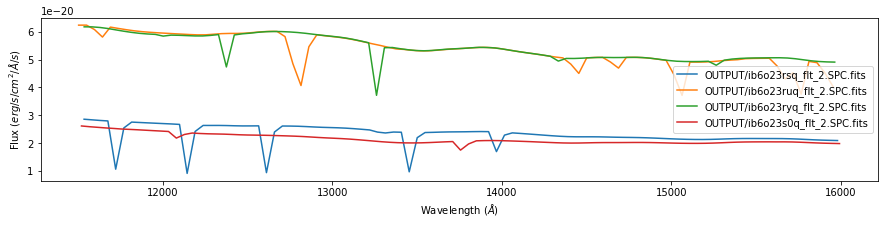

In [31]:
import glob
for s in glob.glob("OUTPUT/ib6o2*2.SPC.fits"):
    print (s)
    d1 = fits.open(s)["BEAM_%dA" % (ID)].data
    w = d1["LAMBDA"]
    c = d1["CONTAM"]
    vg = (w>11500) & (w<16000)
    plt.plot(w[vg],c[vg],label=s)
plt.legend()
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux ($erg/s/cm^2/\AA/s$)');

<h1>More advanced extraction

We now use the aXe Fluxcube extraction

- This method uses multiple mosaics, generated with the same WCS as the G141 mosaic and the SeXtractor segmentation file seg.fits which was generated above when we created the catalog, to generate more accurate contamination estimates and weighted extraction.
- The use of aXedrizzle allows us to combine 2D and 1D spectra taken at the same orientation, which is the case of the data in this example.
- In this example, we use the actual segmenation map to determine the shape of objects. This is done via a set of Fluxcube files was we need to first generate

We create a new directory called DRIZZLE that we will need:

In [32]:

if os.path.isdir("DRIZZLE"):
    shutil.rmtree("DRIZZLE")
os.mkdir("DRIZZLE")
os.environ['AXE_DRIZZLE_PATH'] = './DRIZZLE/' 
print ('--> variable AXE_DRIZZLE_PATH  set to "./DRIZZLE/"')

--> variable AXE_DRIZZLE_PATH  set to "./DRIZZLE/"


We already have an F140W mosaic and we now create an F125W mosaic with the same final WCS as the G141 mosaic

In [33]:
os.chdir(cwd)

if os.path.isdir("F125W"):
    shutil.rmtree("F125W")

os.mkdir("F125W")


In [34]:
os.system("cp cookbook_data/F125W/*flt.fits F125W/")
os.system("cp cookbook_data/F125W/F125W.lis F125W/")
os.chdir("F125W")
!cat F125W.lis

ib6o03n9q_flt.fits
ib6o03nbq_flt.fits
ib6o03nfq_flt.fits
ib6o03niq_flt.fits
ib6o03nmq_flt.fits
ib6o03npq_flt.fits
ib6o04tuq_flt.fits
ib6o04twq_flt.fits
ib6o04u7q_flt.fits
ib6o04uaq_flt.fits
ib6o04ueq_flt.fits
ib6o04uwq_flt.fits
ib6o09h7q_flt.fits
ib6o09h9q_flt.fits
ib6o09hdq_flt.fits
ib6o09hwq_flt.fits
ib6o09i0q_flt.fits
ib6o09i3q_flt.fits
ib6oa8viq_flt.fits
ib6oa8vlq_flt.fits
ib6oa8vpq_flt.fits
ib6ob8vtq_flt.fits


In [35]:
ref = "../G141/G141_drz.fits[1]"
astrodrizzle.AstroDrizzle("@F125W.lis",output="F125W",in_memory=False,skysub="yes",build=True,driz_cr_corr=True,driz_cr=True,final_wcs=True,driz_separate=True,driz_sep_wcs=True,driz_sep_refimage=ref,final_refimage=ref)

Setting up logfile :  astrodrizzle.log
AstroDrizzle Version 3.1.8 (2020-07-27 10:34:52 -0400) started at: 20:31:14.420 (02/11/2020)

==== Processing Step  Initialization  started at  20:31:14.423 (02/11/2020)

Preserving original of:  ib6o03n9q_flt.fits as  OrIg_files/ib6o03n9q_flt.fits
Preserving original of:  ib6o03nbq_flt.fits as  OrIg_files/ib6o03nbq_flt.fits
Preserving original of:  ib6o03nfq_flt.fits as  OrIg_files/ib6o03nfq_flt.fits
Preserving original of:  ib6o03niq_flt.fits as  OrIg_files/ib6o03niq_flt.fits
Preserving original of:  ib6o03nmq_flt.fits as  OrIg_files/ib6o03nmq_flt.fits
Preserving original of:  ib6o03npq_flt.fits as  OrIg_files/ib6o03npq_flt.fits
Preserving original of:  ib6o04tuq_flt.fits as  OrIg_files/ib6o04tuq_flt.fits
Preserving original of:  ib6o04twq_flt.fits as  OrIg_files/ib6o04twq_flt.fits
Preserving original of:  ib6o04u7q_flt.fits as  OrIg_files/ib6o04u7q_flt.fits
Preserving original of:  ib6o04uaq_flt.fits as  OrIg_files/ib6o04uaq_flt.fits
Preserving

       EXT = 'SCI',1
             Data units type: COUNT-RATE
             Conversion factor (data->brightness):  60.797431635711504

   *   Image: ib6o04uwq_flt.fits
       EXT = 'SCI',1
             Data units type: COUNT-RATE
             Conversion factor (data->brightness):  60.797431635711504

   *   Image: ib6o09h7q_flt.fits
       EXT = 'SCI',1
             Data units type: COUNT-RATE
             Conversion factor (data->brightness):  60.797431635711504

   *   Image: ib6o09h9q_flt.fits
       EXT = 'SCI',1
             Data units type: COUNT-RATE
             Conversion factor (data->brightness):  60.797431635711504

   *   Image: ib6o09hdq_flt.fits
       EXT = 'SCI',1
             Data units type: COUNT-RATE
             Conversion factor (data->brightness):  60.797431635711504

   *   Image: ib6o09hwq_flt.fits
       EXT = 'SCI',1
             Data units type: COUNT-RATE
             Conversion factor (data->brightness):  60.797431635711504

   *   Image: ib6o09i0q_flt.fit

Writing out image to disk: ib6o04tuq_single_sci.fits
Writing out image to disk: ib6o04ueq_single_sci.fits
Writing out image to disk: ib6o03n9q_single_wht.fits
Writing out image to disk: ib6o04uwq_single_sci.fits
Writing out image to disk: ib6o03nbq_single_wht.fits
Writing out image to disk: ib6o03npq_single_wht.fits
Writing out image to disk: ib6o03nmq_single_wht.fits
Writing out image to disk: ib6o03nfq_single_wht.fits
Writing out image to disk: ib6o04u7q_single_wht.fits
Writing out image to disk: ib6o03niq_single_wht.fits
Writing out image to disk: ib6o04twq_single_wht.fits
Writing out image to disk: ib6o04uaq_single_wht.fits
Writing out image to disk: ib6o04tuq_single_wht.fits
Writing out image to disk: ib6o04ueq_single_wht.fits
Writing out image to disk: ib6o04uwq_single_wht.fits
-Generating simple FITS output: ib6o09i0q_single_sci.fits
-Generating simple FITS output: ib6o09hwq_single_sci.fits
-Generating simple FITS output: ib6o09h7q_single_sci.fits
-Generating simple FITS output:

-Generating simple FITS output: ib6o09i3q_sci1_blt.fits
Writing out image to disk: ib6o09i3q_sci1_blt.fits
    Blot: creating blotted image:  ib6oa8viq_flt.fits[sci,1]
Using default C-based coordinate transformation...
-Generating simple FITS output: ib6oa8viq_sci1_blt.fits
Writing out image to disk: ib6oa8viq_sci1_blt.fits
    Blot: creating blotted image:  ib6oa8vlq_flt.fits[sci,1]
Using default C-based coordinate transformation...
-Generating simple FITS output: ib6oa8vlq_sci1_blt.fits
Writing out image to disk: ib6oa8vlq_sci1_blt.fits
    Blot: creating blotted image:  ib6oa8vpq_flt.fits[sci,1]
Using default C-based coordinate transformation...
-Generating simple FITS output: ib6oa8vpq_sci1_blt.fits
Writing out image to disk: ib6oa8vpq_sci1_blt.fits
    Blot: creating blotted image:  ib6ob8vtq_flt.fits[sci,1]
Using default C-based coordinate transformation...
-Generating simple FITS output: ib6ob8vtq_sci1_blt.fits
Writing out image to disk: ib6ob8vtq_sci1_blt.fits
==== Processing S

We create a directory to prepare our Fluxcubes:

In [36]:
os.chdir(cwd)

if os.path.isdir("FLX"):
    shutil.rmtree("FLX")

os.mkdir("FLX")

Copy the direct imaging and G141 mosaic in the Fluxcube directory:

In [37]:
os.chdir("FLX")

os.system("cp ../F125W/F125W_drz.fits ./")
os.system("cp ../F140W/F140W_drz.fits ./")
os.system("cp ../G141/G141_drz.fits ./")

0

We will need access to the G141 FLT files, and copy them here instead of working in the ./DATA directory

In [38]:
os.system("cp ../DATA/*flt.fits .")

0

We also need the segmenation file we created earlier. Here we copy one we already prepared.

In [39]:
os.system("cp ../cookbook_data/catalog/seg.fits .")

0

Create a cubelist.lis file that contains a description of the mosaics we are using and populates the PHOTPLAM and AB magnitude zeropoints

In [47]:
import glob

dir_images = []
for dir_image in glob.glob("F*drz.fits"):
    print (dir_image)
    fname = dir_image.split("_")[0]
    dir_images.append(dir_image)
        
s = []
for dir_image in dir_images:
    print (dir_image)  
    PHOTPLAM = fits.open(dir_image)[0].header["PHOTPLAM"] # Wavelength of filter in A
    PHOTFLAM = fits.open(dir_image)[0].header["PHOTFLAM"] # Wavelength of filter in A
    ABZP = -48.60 - 2.5*np.log10(PHOTFLAM * PHOTPLAM**2/3e8/1e10 )
    ss = "%s %f %f\n" % (dir_image, PHOTPLAM/10., ABZP)
    s.append(ss)
open("cubelist.lis","w").writelines(s)
    

F125W_drz.fits
F140W_drz.fits
F125W_drz.fits
F140W_drz.fits


In [48]:
!cat cubelist.lis

F125W_drz.fits 1248.606000 26.231020
F140W_drz.fits 1392.290700 26.453120


We now can create the Flexcube

This will combined the mosaics and segmentation file into a flexcube that can be used to compute the contamination and perform the extraction. A different one is generated for each G141 FLT file

In [49]:
axetasks.fcubeprep(grism_image = os.path.join("G141_drz.fits"),
    segm_image = os.path.join("seg.fits"),
    filter_info = "cubelist.lis",
    AB_zero = "yes",
    dim_info = dimension_info)
os.system("cp ib6o23*FLX.fits ../DATA/")

Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...


0

In [51]:
os.chdir(cwd)
os.system("cp G141/*flt.fits DATA/")

axetasks.axeprep(inlist="aXe.lis",
                     configs="G141.F140W.V4.31.conf",
                     backgr=True,
                     backims="WFC3.IR.G141.sky.V1.0.fits",
                     norm=False,
                     mfwhm=3.0)

At this point, we should have generated 2 master FLX file, one for each input imaging mosaic, and four FLX files, one for each of our G141 FLT file.


413.0


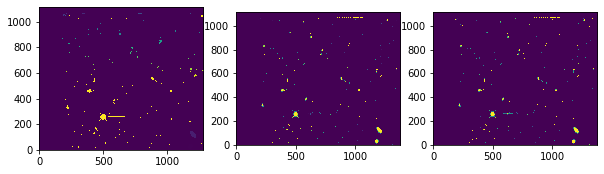

In [57]:
plt.rcParams["figure.figsize"] = (10,7)

plt.subplot(1,3,1)
print (np.max(fits.open("DATA/ib6o23ryq_flt_2.FLX.fits")[1].data))

im = plt.imshow(fits.open("DATA/ib6o23ryq_flt_2.FLX.fits")["SEGM"].data*1.,origin="corner")
im.set_clim(0,199)

plt.subplot(1,3,2)
im = plt.imshow(fits.open("DATA/ib6o23ryq_flt_2.FLX.fits")["LAMBDA1248"].data,origin="corner")
im.set_clim(0,1e-20)

plt.subplot(1,3,3)
im = plt.imshow(fits.open("DATA/ib6o23ryq_flt_2.FLX.fits")["LAMBDA1392"].data,origin="corner")
im.set_clim(0,1e-20)

#reload(nf)
#nf.disp("ib6o23ryq_flt_2.FLX.fits[SEGM]",1,z1=0,z2=1)
# nf.disp("ib6o23ryq_flt_2.FLX.fits[2]",2,z1=0,z2=3e-18)
# nf.disp("ib6o23ryq_flt_2.FLX.fits[3]",3,z1=0,z2=1e-18)

We want to work on the non background subtracted G141 data. The ones in the DATA directory have already been subtracted during our basic extraction, so we copy the original G141 data back into the DATA directory.

In [58]:
os.chdir(cwd)

os.system("cp G141/*flt.fits DATA/")

0

We run aXeprep on the data. This step also substracts the background.

In [59]:
axetasks.axeprep(inlist="aXe.lis",
                     configs="G141.F140W.V4.31.conf",
                     backgr=True,
                     backims="WFC3.IR.G141.sky.V1.0.fits",
                     norm=False,
                     mfwhm=3.0)

Checking the background levels that were subtracted from each fo the G141 FLT files

In [60]:
print( fits.open("DATA/ib6o23rsq_flt.fits")[1].header["SKY_CPS"],"e/s")
print( fits.open("DATA/ib6o23ruq_flt.fits")[1].header["SKY_CPS"],"e/s")
print( fits.open("DATA/ib6o23ryq_flt.fits")[1].header["SKY_CPS"],"e/s")
print( fits.open("DATA/ib6o23s0q_flt.fits")[1].header["SKY_CPS"],"e/s")

0.8666695 e/s
0.9323076 e/s
0.8832059 e/s
0.8736654 e/s


We run axecore using the flexcube models

In [61]:
axetasks.axecore('aXe.lis',
                 "G141.F140W.V4.31.conf",
                 extrfwhm=4.,
                 drzfwhm=3.,
                 backfwhm=0.,
                 orient=False,
                 weights=True,
                 slitless_geom=False,
                 cont_model='fluxcube',
                 sampling='drizzle',
                 exclude=True)


Writing non-linear coefficients to file


Storing non-linear coefficients: 
WFC3: IR

DRZSCALE set to: 0.1282500028610229

Writing non-linear coefficients to file


Storing non-linear coefficients: 
WFC3: IR

DRZSCALE set to: 0.1282500028610229

Writing non-linear coefficients to file


Storing non-linear coefficients: 
WFC3: IR

DRZSCALE set to: 0.1282500028610229

Writing non-linear coefficients to file


Storing non-linear coefficients: 
WFC3: IR

DRZSCALE set to: 0.1282500028610229


Now we use aXedrizzle to combine the dithered observations into single 2D and 1D spectra.
We first run the drzprep routine and then the axedrizzle task. The latter will take several minutes to run.

Use optimal extraction or notm

In [63]:
opt_extr=False

In [64]:
axetasks.drzprep(inlist = "aXe.lis",
            configs =  "G141.F140W.V4.31.conf",
            back = False,opt_extr=opt_extr)


In [65]:
axetasks.axecrr(inlist="aXe.lis",
    configs="G141.F140W.V4.31.conf",
    infwhm = 4.0,
    outfwhm = 3.0,
    back = False,
    driz_separate = 'yes',
    opt_extr=opt_extr
    )


Deleting old directory...
Creating temporary directory:  DRIZZLE/tmp
Object ID36: 1 empty contributors deleted.
Object ID380: 1 empty contributors deleted.
Object ID61: 2 empty contributors deleted.
Object ID77: 2 empty contributors deleted.
Object ID379: 2 empty contributors deleted.
Object ID139: 2 empty contributors deleted.
Object ID57: 3 empty contributors deleted.
Object ID174: 2 empty contributors deleted.
Object ID41: 1 empty contributors deleted.
Object ID40: 1 empty contributors deleted.
Object ID17: 2 empty contributors deleted.
Object ID266: 2 empty contributors deleted.
Object ID374: 2 empty contributors deleted.
Object ID227: 2 empty contributors deleted.
Object ID362: 2 empty contributors deleted.
Object ID21: 2 empty contributors deleted.
Object ID397: 1 empty contributors deleted.
Object ID76: 2 empty contributors deleted.
Object ID378: 2 empty contributors deleted.
Object ID401: 1 empty contributors deleted.
Object ID114: 2 empty contributors deleted.
Object ID381: 2 

Done!
Drizzling object : ID406 ... 
Done!
Drizzling object : ID113 ... 
Done!
Drizzling object : ID390 ... 
Done!
Drizzling object : ID71 ... 
Done!
Drizzling object : ID144 ... 
Done!
Drizzling object : ID328 ... 
Done!
Drizzling object : ID26 ... 
Done!
Drizzling object : ID282 ... 
Done!
Drizzling object : ID353 ... 
Done!
Drizzling object : ID216 ... 
Done!
Drizzling object : ID168 ... 
Done!
Drizzling object : ID187 ... 
Done!
Drizzling object : ID304 ... 
Done!
Drizzling object : ID241 ... 
Done!
Drizzling object : ID191 ... 
Done!
Drizzling object : ID312 ... 
Done!
Drizzling object : ID257 ... 
Done!
Drizzling object : ID129 ... 
Done!
Drizzling object : ID345 ... 
Done!
Drizzling object : ID200 ... 
Done!
Drizzling object : ID344 ... 
Done!
Drizzling object : ID201 ... 
Done!
Drizzling object : ID313 ... 
Done!
Drizzling object : ID256 ... 
Done!
Drizzling object : ID190 ... 
Done!
Drizzling object : ID305 ... 
Done!
Drizzling object : ID240 ... 
Done!
Drizzling object : ID169

Done!
Drizzling object : ID100 ... 
Done!
Drizzling object : ID62 ... 
Done!
Drizzling object : ID229 ... 
Done!
Drizzling object : ID383 ... 
Done!
Drizzling object : ID116 ... 
Done!
Drizzling object : ID403 ... 
Done!
Drizzling object : ID395 ... 
Done!
Drizzling object : ID141 ... 
Done!
Drizzling object : ID23 ... 
Done!
Drizzling object : ID287 ... 
Done!
Drizzling object : ID268 ... 
Done!
Drizzling object : ID213 ... 
Done!
Drizzling object : ID356 ... 
Done!
Drizzling object : ID58 ... 
Done!
Drizzling object : ID182 ... 
Done!
Drizzling object : ID244 ... 
Done!
Drizzling object : ID301 ... 
Done!
Drizzling object : ID194 ... 
Done!
Drizzling object : ID252 ... 
Done!
Drizzling object : ID317 ... 
Done!
Drizzling object : ID205 ... 
Done!
Drizzling object : ID340 ... 
Done!
Drizzling object : ID7 ... 
Done!
Drizzling object : ID16 ... 
Done!
Drizzling object : ID20 ... 
Done!
Drizzling object : ID6 ... 
Done!
Drizzling object : ID10 ... 
Done!
Drizzling object : ID398 ... 
Do

The extraction results are in the DRIZZLE directory we created, and we can examine a 2D, rectified and wavelength calibrated version of the spectrum we looked at earlier:

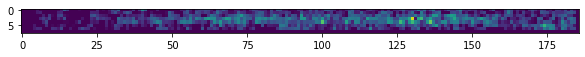

In [71]:
ID = 160
d = fits.open("./DRIZZLE/aXeWFC3_G141_2.STP.fits")["BEAM_%dA" % (ID)].data
im = plt.imshow(d)
im.set_clim(0,0.1)

We plot the extracted 1D spectra of our source and the estimate of the contamination:

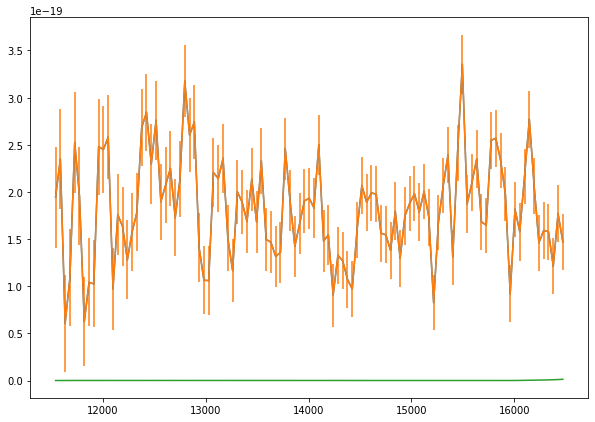

In [72]:
fin = fits.open("./DRIZZLE/aXeWFC3_G141_2.SPC.fits")
tdata = fin["BEAM_%dA" % (ID)].data
x = tdata["LAMBDA"]
f = tdata["FLUX"]
e = tdata["FERROR"]

c = tdata["CONTAM"]
vg = (x>11500) & (x<16500)
plt.plot(x[vg],f[vg])
plt.errorbar(x[vg],f[vg],e[vg])

plt.plot(x[vg],c[vg])

The MEF files in the DRIZZLE directory contain the 2D version of the spectrum of a source as well as estimte of the contamination:

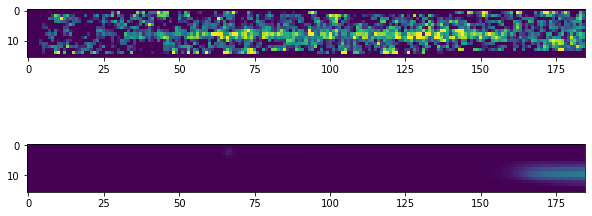

In [73]:
plt.subplot(3,1,1)
d = fits.open("./DRIZZLE/aXeWFC3_G141_mef_ID%d.fits" % (ID))["SCI"].data
im = plt.imshow(d)
im.set_clim(0,0.05)

plt.subplot(3,1,2)
d = fits.open("./DRIZZLE/aXeWFC3_G141_mef_ID%d.fits" % (ID))["CON"].data
im = plt.imshow(d)
im.set_clim(0,0.05)

The individually extracted spectra are in the OUTPUT directory and the combined ones in the DRIZZLE directory. We can plot and compare them:

OUTPUT/ib6o23rsq_flt_2.SPC.fits
OUTPUT/ib6o23ruq_flt_2.SPC.fits
OUTPUT/ib6o23ryq_flt_2.SPC.fits
OUTPUT/ib6o23s0q_flt_2.SPC.fits


<ErrorbarContainer object of 3 artists>

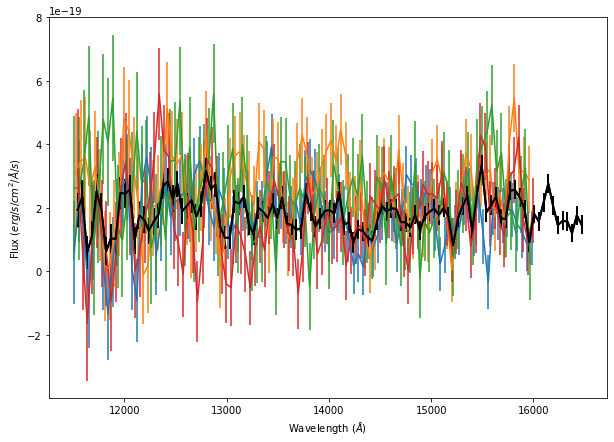

In [74]:
import glob

for s in glob.glob("OUTPUT/ib6o2*2.SPC.fits"):
    print (s)
    d1 = fits.open(s)["BEAM_%dA" % (ID)].data
    w = d1["LAMBDA"]
    f = d1["FLUX"]
    e = d1["FERROR"]
    vg = (w>11500) & (w<16000)
    plt.errorbar(w[vg],f[vg],e[vg])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux ($erg/s/cm^2/\AA/s$)');


fin = fits.open("./DRIZZLE/aXeWFC3_G141_2.SPC.fits")
tdata = fin["BEAM_%dA" % (ID)].data
x = tdata["LAMBDA"]
f = tdata["FLUX"]
e = tdata["FERROR"]

c = tdata["CONTAM"]
vg = (x>11500) & (x<16500)
#plt.errorbar(x[vg],y[vg],e[vg])
plt.plot(x[vg],f[vg],color='k',lw=2)
plt.errorbar(x[vg],f[vg],e[vg],color='k',lw=2)
